In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# plots
import seaborn as sns
import matplotlib.pyplot as plt

#classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

#train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

#feature selection
from sklearn.feature_selection import SelectKBest, chi2 , f_classif , f_regression

%matplotlib inline

In [2]:
import csv

with open('x_train_3_lab.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split(",") for line in stripped if line)
    with open('x_train_3.csv', 'w',newline='') as out_file:
        writer = csv.writer(out_file)
        writer.writerow(('1', '2', '3', 'class'))
        writer.writerows(lines)

In [3]:
# import data
dataset = pd.read_csv('x_train_3.csv')

In [4]:
dataset.head(10)

,1,2,3,class
0,18.270700,0.774875,-3.025317,2.0
1,12.396768,-18.871904,12.869293,8.0
2,9.052249,6.799930,-18.164120,1.0
3,18.870045,15.213517,-2.241253,0.0
4,4.382588,9.243156,-14.315777,1.0
5,0.213093,3.627029,-14.432624,1.0
6,-28.071377,2.110796,9.310006,6.0
7,-1.329998,13.889242,0.286538,6.0
8,-18.604052,-7.123417,-5.299009,2.0
9,0.797920,-19.306358,16.165659,4.0


In [5]:
dataset['class'].value_counts()

5.0    2160
4.0    2100
8.0    2070
1.0    1860
0.0    1410
3.0    1320
6.0     780
2.0     420
9.0     300
7.0     240
Name: class, dtype: int64

In [6]:
np.random.seed(0) #use the same random sample each time

In [7]:
class7_lenght = len(dataset[dataset['class']==7]) #take the lenght of the smallest class (class7)
indices_class7 = dataset[dataset['class']==7].index #take the indices of the class7 images

In [8]:
# random indices class 5
indices_class5 = dataset[dataset['class']==5].index #take the indices of the class5 images
random_class5_indices = np.random.choice(indices_class5,class7_lenght, replace=False) #take 240 random indices from class5

In [9]:
# random indices class 4
indices_class4 = dataset[dataset['class']==4].index
random_class4_indices = np.random.choice(indices_class4,class7_lenght, replace=False)

In [10]:
# random indices class 8
indices_class8 = dataset[dataset['class']==8].index
random_class8_indices = np.random.choice(indices_class8,class7_lenght, replace=False)

In [11]:
# random indices class 1
indices_class1 = dataset[dataset['class']==1].index
random_class1_indices = np.random.choice(indices_class1,class7_lenght, replace=False)

In [12]:
# random indices class 0
indices_class0 = dataset[dataset['class']==0].index
random_class0_indices = np.random.choice(indices_class0,class7_lenght, replace=False)

In [13]:
# random indices class 3
indices_class3 = dataset[dataset['class']==3].index
random_class3_indices = np.random.choice(indices_class3,class7_lenght, replace=False)

In [14]:
# random indices class 6
indices_class6 = dataset[dataset['class']==6].index
random_class6_indices = np.random.choice(indices_class6,class7_lenght, replace=False)

In [15]:
# random indices class 2
indices_class2 = dataset[dataset['class']==2].index
random_class2_indices = np.random.choice(indices_class2,class7_lenght, replace=False)

In [16]:
# random indices class 9
indices_class9 = dataset[dataset['class']==9].index
random_class9_indices = np.random.choice(indices_class9,class7_lenght, replace=False)

In [17]:
#concatinate random indices from all classes to one array
indices_combined = np.concatenate([random_class5_indices,random_class4_indices,random_class8_indices,random_class1_indices, random_class0_indices,random_class3_indices, random_class6_indices,random_class2_indices, random_class9_indices, indices_class7])

In [18]:
len(indices_combined) #random indices array length (10*240)

2400

In [19]:
#find all these random indices from dataset and put them in a new dataframe df_balanced
#now we have a balanced dataframe with 240 images of each class
df_balanced = dataset.loc[indices_combined] 

In [20]:
df_balanced.reset_index(inplace = True) #reset the indices of the new dataframe

In [21]:
dataset_big = df_balanced.drop(['index'],axis=1) #drop the index column from the new dataframe

In [22]:
dataset_big.head(10)

,1,2,3,class
0,14.308720,-18.242092,6.722791,5.0
1,12.902898,-11.999542,-9.734824,5.0
2,16.918896,-16.867287,4.671368,5.0
3,5.347383,-15.167626,3.891540,5.0
4,9.434912,-17.203398,-4.885763,5.0
5,5.960486,-3.054672,-0.776122,5.0
6,6.225786,-15.822212,1.103796,5.0
7,16.049709,-11.336446,-5.864088,5.0
8,18.519135,19.623085,-2.553057,5.0
9,15.161098,-21.005285,0.919621,5.0


In [23]:
dataset_big.values # with .values we are taking the dataframe as an array

array([[ 14.30871964, -18.24209213,   6.72279072,   5.        ],
       [ 12.90289783, -11.99954224,  -9.73482418,   5.        ],
       [ 16.91889572, -16.86728668,   4.67136765,   5.        ],
       ...,
       [-13.94667339,  -4.42946243,  -4.77007675,   7.        ],
       [-20.24118996,  -9.7708149 ,  -3.01394749,   7.        ],
       [-11.08327675,  -3.58953881,  -3.37414885,   7.        ]])

In [24]:
X = dataset_big.iloc[:,:-1].values #we drop the last value which is the class to create a features dataframe
y = dataset_big.iloc[:,3].values #we keep only the last value to create a class dataframe

In [25]:
min_max = MinMaxScaler() #initialize min_max as a MinMaxScaler()
X_scaled = min_max.fit_transform(X) #we perform a min-max scale to features in order to have values from 0 to 1

In [26]:
X_scaled

array([[0.76815475, 0.21789788, 0.56897431],
       [0.74408797, 0.32226229, 0.258701  ],
       [0.81283932, 0.2408822 , 0.53029909],
       ...,
       [0.28444025, 0.44882066, 0.35230075],
       [0.1766821 , 0.35952268, 0.38540883],
       [0.3334598 , 0.4628627 , 0.378618  ]])

In [27]:
#we split the sample to train and test with an 80-20 analogy
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y) 

In [28]:
#ploting histograms to see if the data follows normal distibution
#plt.hist(X[50])
#plt.show()

In [29]:
classifier_ga = GaussianNB() #initialize classifier_ga as a GaussianNB()
classifier_ml = MultinomialNB() #initialize classifier_ml as a MultinomialNB()
#train the model with classifier_ga
classifier_ga.fit(X_train,y_train)
#test the model with classifier_ga
y_pred_ga = classifier_ga.predict(X_test)
cm = confusion_matrix(y_test,y_pred_ga)

In [30]:
cm #confusion matrix 

array([[33,  6,  0,  0,  0,  4,  0,  1,  3,  1],
       [27,  8,  0,  0,  0,  3,  0,  5,  0,  5],
       [ 0,  1, 40,  0,  0,  2,  0,  5,  0,  0],
       [ 0,  0,  1, 45,  1,  0,  0,  0,  1,  0],
       [ 1,  1,  6,  2, 27,  8,  0,  0,  3,  0],
       [ 1,  8,  3,  0,  4, 26,  0,  0,  0,  6],
       [ 0,  0,  0,  0,  0,  2, 45,  0,  1,  0],
       [ 0,  0,  0,  1,  6,  3,  0, 36,  2,  0],
       [ 0,  0,  1,  0,  2,  1,  4,  7, 33,  0],
       [ 7,  0,  0,  0,  0, 15,  0,  0,  0, 26]], dtype=int64)

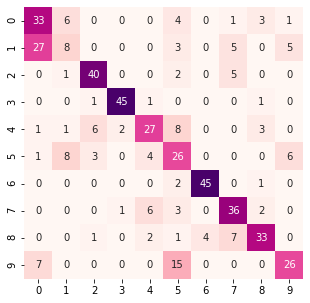

In [31]:
#we transform the confusion matrix to a heatmap
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.heatmap(cm,annot=True,cmap="RdPu",fmt=".0f",cbar=False)
plt.show()

In [32]:
#classidication report
print(classification_report(y_test,y_pred_ga))

              precision    recall  f1-score   support

         0.0       0.48      0.69      0.56        48
         1.0       0.33      0.17      0.22        48
         2.0       0.78      0.83      0.81        48
         3.0       0.94      0.94      0.94        48
         4.0       0.68      0.56      0.61        48
         5.0       0.41      0.54      0.46        48
         6.0       0.92      0.94      0.93        48
         7.0       0.67      0.75      0.71        48
         8.0       0.77      0.69      0.73        48
         9.0       0.68      0.54      0.60        48

    accuracy                           0.66       480
   macro avg       0.67      0.66      0.66       480
weighted avg       0.67      0.66      0.66       480



In [33]:
# ten fold cross validation
# scoring='precision' , scoring='recall' , scoring='f1'
accuracy = cross_val_score(estimator = classifier_ga, X = X_scaled, y = y, cv =10)

In [34]:
#accuracy.mean after running the model for 10 times 
accuracy.mean()

0.635

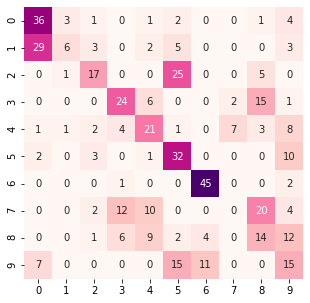

In [35]:
#train the model with classifier_ml
classifier_ml.fit(X_train,y_train)
#test the model with classifier_ml
y_pred_ml = classifier_ml.predict(X_test)
cm_ml = confusion_matrix(y_test,y_pred_ml)

#we transform the confusion matrix to a heatmap
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.heatmap(cm_ml,annot=True,cmap="RdPu",fmt=".0f",cbar=False)
plt.show()

In [36]:
#classidication report
print(classification_report(y_test,y_pred_ml))

              precision    recall  f1-score   support

         0.0       0.48      0.75      0.59        48
         1.0       0.55      0.12      0.20        48
         2.0       0.59      0.35      0.44        48
         3.0       0.51      0.50      0.51        48
         4.0       0.42      0.44      0.43        48
         5.0       0.39      0.67      0.49        48
         6.0       0.75      0.94      0.83        48
         7.0       0.00      0.00      0.00        48
         8.0       0.24      0.29      0.26        48
         9.0       0.25      0.31      0.28        48

    accuracy                           0.44       480
   macro avg       0.42      0.44      0.40       480
weighted avg       0.42      0.44      0.40       480



In [37]:
# ten fold cross validation
# scoring='precision' , scoring='recall' , scoring='f1'
accuracy = cross_val_score(estimator = classifier_ml, X = X_scaled, y = y, cv =10)

In [38]:
#accuracy.mean after running the model for 10 times 
accuracy.mean()

0.425